In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("../Data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [8]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [9]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

In [10]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [11]:
print("Best params: " + str(rf_cv_model.best_params_))


Best params: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [12]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [13]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [14]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

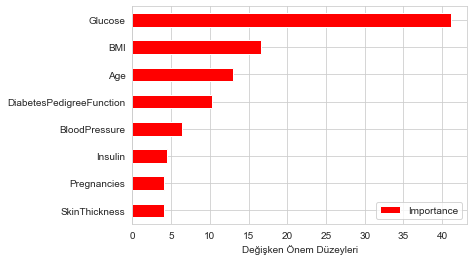

In [15]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")